In [1]:
# Linear regression
# It is a Supervised machine learning technique(prediction and data can be divided in train and test)
# Compulsary condition (target variable should the numeric and continuous)
# x variable (categorical or continuous)

# assumptions:
# 1. There should be linear relationship between the independent and the dependent variable.
# 2. Error terms are normally distributed and there is no pattern among them.
# 3. Minimal multi-collinearity among X-variables
# 4. Homoscedascticity: Variance around the regression line is same for all the predicted values.

In [62]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
lc = pd.read_csv(r"C:\Users\Ashish Kulkarni\Desktop\Data Science\Python\Programs\Linear Regression\LungCapData.csv")

In [4]:
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [5]:
lc.shape

(725, 6)

In [6]:
# What are steps involved in model building? (any model building)
# 1. Identify the problem statement / Requirement
# 2. Gather / collect the data
# 3. Data cleaning / data preparation
# 4. If required to do data exploratory analysis (try to build some graphs)
# 5. For predictive modeling (divide the data in train and test)
# 6. Build the model (train the model)
# 7. Test the model (use the evaluation matrices to check how the model is behaving)
# 8. To improve the model, start everything from step 2 or step 3

In [7]:
lc.isnull().sum() # none of the column have the null values

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [8]:
lc.Gender.replace({"male":1, "female":0}, inplace = True)
lc.Smoke.replace({"no":0, "yes":1}, inplace = True)
lc.Caesarean.replace({"no":0, "yes":1}, inplace = True)

In [9]:
lc.head(10)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
5,6.225,11,58.7,0,0,0
6,4.950,8,63.3,0,1,1
7,7.325,11,70.4,0,1,0
8,8.875,15,70.5,0,1,0
9,6.800,11,59.2,0,1,0


In [10]:
# sampling
from sklearn.model_selection import train_test_split

In [11]:
lc_x = lc.iloc[ : , 1 : ]
lc_y = lc.iloc[ : , 0 ]

In [12]:
lc_x_train, lc_x_test, lc_y_train, lc_y_test = train_test_split(lc_x, lc_y, test_size = .2, random_state = 555)

In [13]:
# Linear regression
# do the neccessary import from sklearn
# create a object or run it for first time
# use the fit(x,y) method to build the model
# use predict(x)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [15]:
reg.fit(lc_x_train,lc_y_train) # model has been built

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
pred_value = reg.predict(lc_x_test)
print(pred_value)

[ 6.75140175  9.44831511  4.60809003  8.47045645  5.41316848 10.56973735
  9.80868973  7.01847145  6.36564973  8.45071166  6.82387051  6.29318098
  5.1700648  10.94022063 10.67694122 10.08100269  6.52666894  5.62751421
  7.58629206  6.9501546   9.91621361  5.11241758  9.21870063  8.58290359
 10.38727942  6.08781094 10.31826054  9.17085833  6.31581467  7.18364256
  5.66601921  8.92490734  6.86445145  9.07125623 11.01926498  8.92145747
 13.33911946 10.75602717  7.60924576 11.74525748  9.03204921  5.29979876
  8.81108628 10.41993859  9.69109878  5.81870688 10.12710947 10.17638356
  7.91477887  6.43893144  7.02892054  3.78502273  6.4527268  10.1128905
  9.23084365  6.62134778  6.45135287 10.13925249  8.62447645  7.90925304
 12.35158309  4.85749089  3.7808015   9.31995507  6.71327876  8.79894326
  5.55504546  3.37667861 11.71681955  9.21662469  4.13357434  8.46285468
 10.34462252  6.81834468  8.50343563  4.82451172  5.64835037 12.41300019
  7.92554796  7.76534171  9.21313321  9.13654682  8.

In [17]:
reg.intercept_ # intercept (B0)

-11.438053663399014

In [18]:
reg.coef_

array([ 0.17031491,  0.26361983, -0.56570306,  0.41102263, -0.22680876])

In [19]:
# LungCap = Bo + B1Age + B2Height + B3Smoke + B4Gender + B5Caesarean

In [20]:
reg.score(lc_x_train, lc_y_train) # this is the R square value

0.8608324228896035

In [21]:
# adjusted R square
# 1 - (1-Rsq)*(N-1) / (N-K-1)
# K = 5
# K corresponds to number of x variables
# N = 580
# N is number of observations in train

In [22]:
lc_x_train.shape

(580, 5)

In [23]:
K = 5
N = 580
Rsq = reg.score(lc_x_train, lc_y_train)
Adj_Rsquare = 1 - (1-Rsq)*(N-1) / (N-K-1)
print("Rsquare value is ", Rsq)
print("Adj R square value is ", Adj_Rsquare)

Rsquare value is  0.8608324228896035
Adj R square value is  0.8596201617649485


In [24]:
# property is that it will always pass through mean x

In [25]:
# MSE
error = lc_y_test - pred_value
sq_err = error * error

In [26]:
MSE = np.mean(sq_err)
MSE

1.091331758087304

In [27]:
# RMSE = take the square root of MSE
RMSE = np.sqrt(MSE)
RMSE

1.0446682526464102

In [28]:
# MAE
# Error --> Absolute --> Mean
abs_err = np.absolute(error)
MAE = np.mean(abs_err)
MAE

0.8483033569397176

In [29]:
# MAPE = mean absolute percentage arror
# Error --> Percentage --> Absolute -- > Mean
MAPE = np.mean((abs_err/lc_y_test) *100)
MAPE

12.421625073810697

In [30]:
# SSE and SSR :- we find it on train data and not on test data

In [31]:
# lets do the prediction on the train data
pred_train = reg.predict(lc_x_train)

In [32]:
error_train = lc_y_train - pred_train

In [33]:
np.mean(error_train) # Can I say this as ZERO

1.4371645636009785e-15

(array([  1.,   7.,  34.,  77., 107., 138., 115.,  69.,  26.,   6.]),
 array([-3.3181389 , -2.70919649, -2.10025408, -1.49131166, -0.88236925,
        -0.27342683,  0.33551558,  0.944458  ,  1.55340041,  2.16234283,
         2.77128524]),
 <a list of 10 Patch objects>)

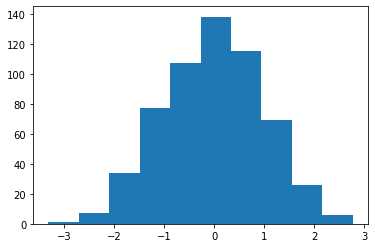

In [34]:
plt.hist(error_train)

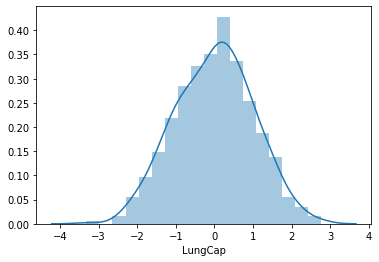

In [35]:
sns.distplot(error_train)

In [36]:
# skewness and kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew

In [37]:
skew(error_train) # its close to zero

-0.058291834174145844

In [38]:
kurtosis(error_train) # close to 3

-0.28220182065672095

In [39]:
# in software k = 3 is equal to zero
3-0.21059492959018433

2.7894050704098157

In [40]:
# that is why the kurtosis which we have found is close to 3

In [41]:
# creating new model and removing Caesarean column
lc_x = lc.iloc[ : , 1 : 5 ]
lc_y = lc.iloc[ : , 0 ]
# to remove a particular column
# lc_x3=lc.drop(["Gender"], axis = 1)
# another way is
# lc.iloc[:, lc.columns != 'Age']

In [42]:
lc_x.head()

,Age,Height,Smoke,Gender
0,6,62.1,0,1
1,18,74.7,1,0
2,16,69.7,0,0
3,14,71.0,0,1
4,5,56.9,0,1


In [43]:
lc_y.head()

0     6.475
1    10.125
2     9.550
3    11.125
4     4.800
Name: LungCap, dtype: float64

In [44]:
lc_x_train, lc_x_test, lc_y_train, lc_y_test = train_test_split(lc_x, lc_y, test_size = .2)

In [45]:
reg.fit(lc_x_train,lc_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred_value = reg.predict(lc_x_test)
print(pred_value)

[ 5.68203396  6.60702538  8.29853226  5.68129845  4.81055814  7.28676621
 12.76870828  2.044309   10.36186366  8.19446045  7.85311035  6.99819618
  5.0781361   7.51309555  8.49456194  8.91692095 10.57959921 11.76344348
  6.44574309  8.74114783  7.54354824 10.08851997  3.81682479  9.91272513
  7.36570429  7.62887356  3.09732367  8.11995279 10.67716977  8.93864854
  8.29781846 10.6331148  12.18137208  8.80988977 11.52262331 12.09976338
 11.22178631  3.13634843  3.4624722   6.95990694  5.74634549  7.05540667
  4.85830801  8.18869473  7.89716532  9.53237198  7.20722834  7.47482802
  6.08340091  7.26074393 10.03571818  7.863928    8.33978088  6.74584457
  5.38769821 11.69396602  7.35624367  6.39503384  7.01208722  4.11411993
  8.9732646   9.16350684 11.04098298 10.74666894  6.70459594  7.12118923
  8.64357726  8.38176503 10.95997408  8.63115726  6.37700115 11.28106763
  7.537047    8.09969624  8.52205525  8.0078914  11.65641229  6.55279599
  9.39856128 11.27234252  7.06693812  7.9449369   7

In [47]:
reg.intercept_

-11.493065006980618

In [48]:
reg.coef_

array([ 0.15478105,  0.26757796, -0.63063394,  0.34282114])

In [49]:
reg.score(lc_x_train, lc_y_train)

0.8586490762483677

In [50]:
lc_x_train.shape

(580, 4)

In [51]:
K = 4
N = 580
Rsq = reg.score(lc_x_train, lc_y_train)
Adr_Rsquare = 1 - (1-Rsq)*(N-1) / (N-K-1)
print("Rsquare value is ", Rsq)
print("Adj R square value is ", Adr_Rsquare)

Rsquare value is  0.8586490762483677
Adj R square value is  0.8576657654744433


In [52]:
error = lc_y_test - pred_value
sq_err = error * error

In [53]:
MSE = np.mean(sq_err)
MSE

1.1450676818681071

In [54]:
RMSE = np.sqrt(MSE)
RMSE

1.070078353144342

In [55]:
abs_err = np.absolute(error)
MAE = np.mean(abs_err)
MAE

0.8589968258357334

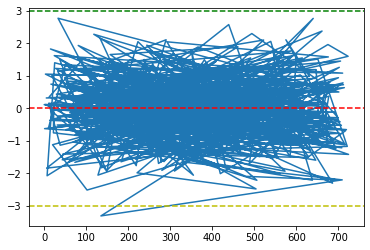

In [56]:
# homoscedasticity
plt.plot(error_train)
plt.axhline(y = 0, linestyle = "--", color = "r")
plt.axhline(y = 3, linestyle = "--", color = "g")
plt.axhline(y = -3, linestyle = "--", color = "y")

In [57]:
pred_actual_df  = pd.DataFrame({"Predicted":error_train, "Actual":lc_y_train})

In [58]:
# pred_actual_df

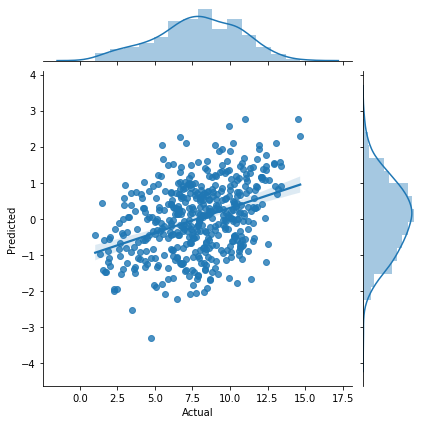

In [59]:
sns.jointplot(x = "Actual", y = "Predicted", kind = "reg", data = pred_actual_df)

In [60]:
# you have to build model number of times
# you have to create dummy variables after removing the null values
# why k = 1.645 SD, because 1.645SD contains 90% of the data and 1SD contain 68% and 1.965SD contain 95% and 2.58SD contain 99% and 3SD contain 99.7% data